空间可达性分析

In [5]:
import read
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
import math
import matplotlib.pyplot as plt

In [6]:
cor_matrix = read.read_txt(filename='/Users/zhujun/Documents/毕业设计/SHA/SHAcode/data/cell_locations/cortex_svz_centroids_coord.txt',delimiter='\t', column_names=[0])

In [7]:
cor_matrix[:10]

,X,Y
ID,,
cell_1,1632.02,1305.70
cell_2,1589.47,669.51
cell_3,1539.89,1185.90
cell_4,1513.94,710.24
cell_5,1477.85,763.87
cell_6,1304.03,1142.40
cell_7,1291.34,957.71
cell_8,1282.49,1725.40
cell_9,1218.73,806.56


In [73]:
ann_matrix=read.read_txt(filename='/Users/zhujun/Documents/毕业设计/SHA/SHAcode/data/cell_locations/cortex_svz_centroids_annot.txt', delimiter='\t', column_names=[0])

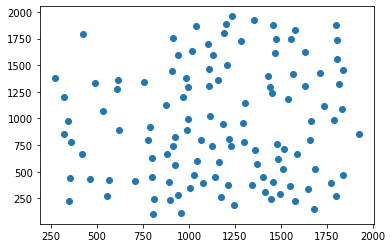

In [10]:
plt.scatter(cor_matrix[:118]['X'],cor_matrix[:118]['Y'])

In [46]:
d = pairwise_distances(cor_matrix[:5])
sd = np.sort(d)


In [47]:
sd[0][0]

4.315837287515549e-05

In [98]:
def dist_weight_matrix(cor,k):
    n_length = len(cor)
    d_matrix = pairwise_distances(cor)
    d_max = d_matrix.max()
    d_min = d_matrix.min()
    for i in range(n_length):
        for j in range(n_length):
            if i == j:
                d_matrix[i][j] = 0
            else:
                d_matrix[i][j] = d_matrix[i][j]
    
    sorted_matrix = np.sort(d_matrix)
    
    sa = {}
    for i in range(n_length):
        a_sum = 0
        for j in range(k+1):
            if sorted_matrix[i][j] == 0:
                a_sum += 0
            else:
                a_sum += (math.exp(1/sorted_matrix[i][j])-1)*100 
        sa[cor.iloc[i].name] = a_sum
        
    sa_df = pd.DataFrame.from_dict(sa, orient='index',columns=['a_sum'])
    sa_df.index.name = 'ID'
             
    return sa_df

In [99]:
weight = dist_weight_matrix(cor_matrix[:100],10)

In [100]:
import seaborn as sns

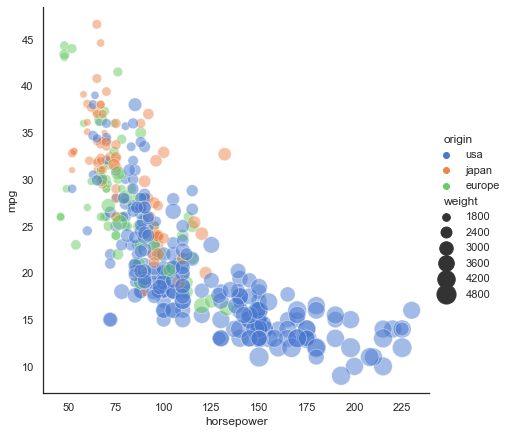

In [110]:
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

In [101]:
weight['cell_types'] = ann_matrix[:100]['cell_types']

In [102]:
weight['X'] = cor_matrix[:100]['X']
weight['Y'] = cor_matrix[:100]['Y']

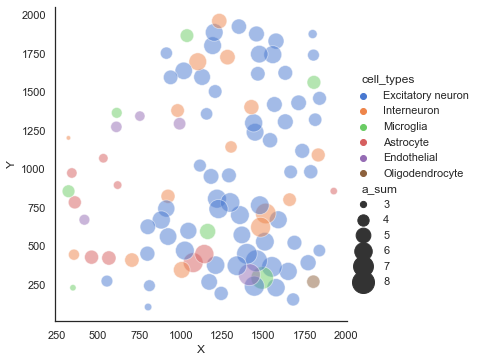

In [121]:
sns.set_theme(style="white")
sns.relplot(x="X", y="Y", hue="cell_types", size="a_sum",height=5,sizes=(20,500),
            alpha=0.5, palette="muted",
             data=weight)

In [122]:
def plot_spatial_accessibility(a_sum,ann,cor,p_sizes=(20,500),p_alpha=0.5,p_palette='muted',p_height=5):
    a_sum['cell_types'] = ann['cell_types']
    a_sum['X'] = cor['X']
    a_sum['Y'] = cor['Y']
    sns.relplot(x="X", y="Y", hue="cell_types", size="a_sum",height=p_height,sizes=p_sizes,
            alpha=p_alpha, palette=p_palette,
             data=a_sum) 

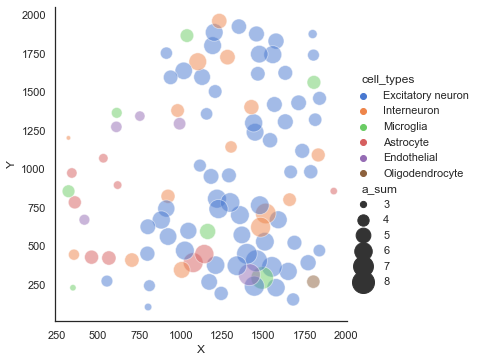

In [123]:
plot_spatial_accessibility(weight,ann_matrix,cor_matrix)